<H1><center>Tarea 7, Estadística Matemática</center></H1>
<H4><center>Daniela Alvarez Rodriguez</center></H4>
<H3><center>Codigo : 202020209</center></H3>
<H1></H1>

<hr style="border:2px solid gray"> </hr>

In [3]:
#Punto 1
import scipy.stats as ss

#[b]

n = 50
alpha = 0.05
theta = 1

pdf1 = ss.gamma(n,theta)

k1 = pdf1.ppf(1 - alpha)

print("k1 = " + str(k1))

#[c]
pdf2 = ss.norm(0,1/12)

y1 = pdf2.ppf(0.95)

print("sqrt(n)(k - 0.5) =" + str(y1))

#[d]

pdf3 = ss.norm(0,1/18)

y2 = pdf2.ppf(0.9)

print("sqrt(n)(k - 2/3) =" + str(y2))

k1 = 63.17105670200203
sqrt(n)(k - 0.5) =0.13707113557928935
sqrt(n)(k - 2/3) =0.10679596379538336


20
y=27.203571029356844
k prima =0.2290827034051103
100
y=117.4068831867789
k prima =0.1897484980796427
1000
y=1056.6952292962342
k prima =0.16924047716456206


Text(0, 0.5, 'Power')

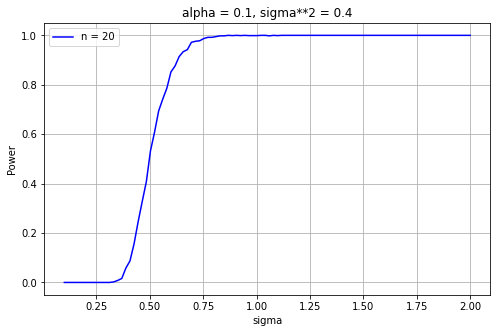

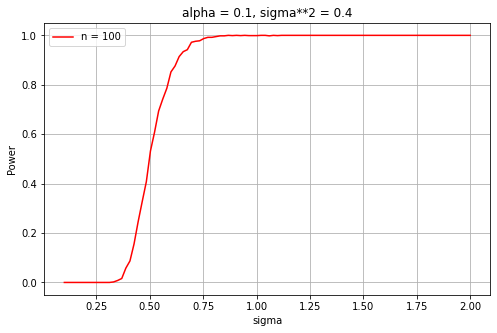

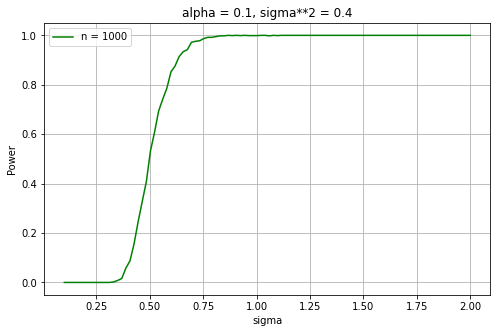

In [32]:
#Punto 2
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np

alpha = 0.1
sigma_0 = 0.4
n = [20,100,1000]
k = []

for m in n:
    pdf = ss.chi2(m-1)
    y = pdf.ppf(1 - alpha)
    kprima = y*(sigma_0**2)/(m-1)
    k.append(kprima)
    print(str(m))
    print("y=" + str(y))
    print("k prima =" + str(kprima))

def rechaza_h0(X):
    S_2 = np.var(X)
    n = X.shape[0]
    c = 0 
    if n == 20:
        c = k[0]
    elif n == 100:
        c = k[1]
    else:
        c = k[2]

    if S_2 <= c:
        return False
    else:
        return True
    
# Power function
def power(mu, sigma, n):
    answer = []
    for i in range(1000):
        X_norm = np.random.normal(mu, sigma, n)
        r = rechaza_h0(X_norm)
        answer.append(r)
    return np.mean(answer)

# Plot the power function
sigma = np.linspace(0.1, 2, 100)
powerf = []
mu = 1
for m in n:
    power_values = []
    for s in sigma:
        power_values.append(power(mu, s, m))
        powerf.append(power_values)

# FIGURAS
fig, ax = plt.subplots(figsize=[8,5])
plt.plot(sigma,powerf[0],color='blue',label='n = 20')
plt.legend()
plt.grid()
plt.title('alpha = 0.1, sigma**2 = 0.4')
plt.xlabel('sigma')
plt.ylabel('Power')

fig, ax = plt.subplots(figsize=[8,5])
plt.plot(sigma,powerf[1],color='red',label='n = 100')
plt.legend()
plt.grid()
plt.title('alpha = 0.1, sigma**2 = 0.4')
plt.xlabel('sigma')
plt.ylabel('Power')

fig, ax = plt.subplots(figsize=[8,5])
plt.plot(sigma,powerf[2],color='green',label='n = 1000')
plt.legend()
plt.grid()
plt.title('alpha = 0.1, sigma**2 = 0.4')
plt.xlabel('sigma')
plt.ylabel('Power')



Text(0, 0.5, 'Power')

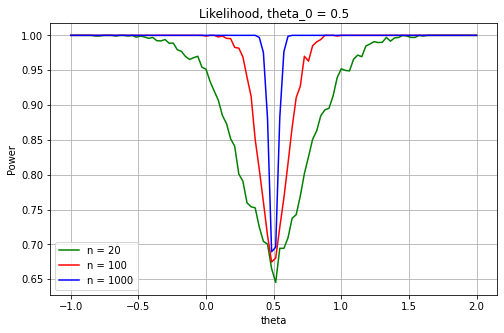

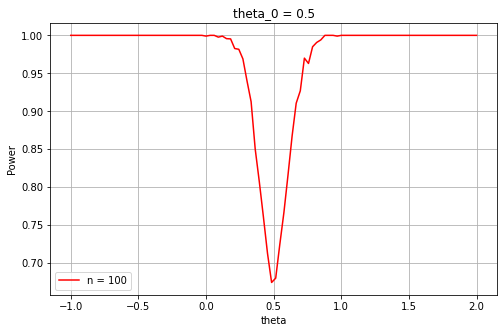

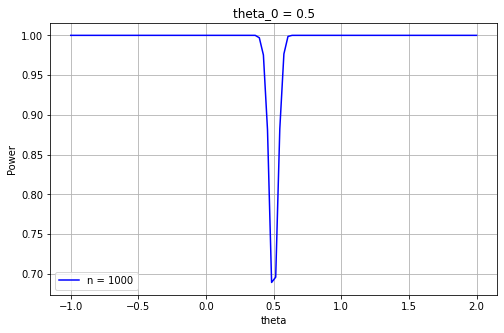

In [40]:
#Punto 4
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
n = [20,100,1000]
#Pruebas

# Likelihood test
def likelihood_ratio_test(X, theta):
    med = np.median(X)
    n = len(X)
    R = 2 * (np.sum(np.abs(X - theta)) - np.sum(np.abs(X - med)))
    return R >= k

def wald_test(X, theta):
    n = len(X)
    med = np.median(X)
    W = (np.sqrt(n)*(med - theta))**2
    return W >= k 

def score_test(X, theta):
    n = len(X)
    S_klein = np.sum(np.sign(X - theta))
    S = (S_klein**2)/n
    return S >= k


theta = np.linspace(-1, 2, 100)
theta_0 = 0.5
pow1 = []
for m in n:
    powers = []
    for j in theta:
        result = []
        for i in range(1000):
            X = ss.laplace.rvs(loc=j, scale=1, size=m)
            result.append(likelihood_ratio_test(X, theta_0))
        powers.append(np.mean(result))
    pow1.append(powers)

#FIGURAS
fig, ax = plt.subplots(figsize=[8,5])
plt.plot(theta,pow1[0],color='green',label='n = 20')
plt.plot(theta,pow1[1],color='red',label='n = 100')
plt.plot(theta,pow1[2],color='blue',label='n = 1000')
plt.legend()
plt.grid()
plt.title('Likelihood, theta_0 = 0.5')
plt.xlabel('theta')
plt.ylabel('Power')

theta = np.linspace(-1, 2, 100)
theta_0 = 0.5
pow2 = []
for m in n:
    powers = []
    for j in theta:
        result = []
        for i in range(1000):
            X = ss.laplace.rvs(loc=j, scale=1, size=m)
            result.append(wald_test(X, theta_0))
        powers.append(np.mean(result))
    pow2.append(powers)

#FIGURAS
fig, ax = plt.subplots(figsize=[8,5])
plt.plot(theta,pow2[0],color='green',label='n = 20')
plt.plot(theta,pow2[1],color='red',label='n = 100')
plt.plot(theta,pow2[2],color='blue',label='n = 1000')
plt.legend()
plt.grid()
plt.title('Wald, theta_0 = 0.5')
plt.xlabel('theta')
plt.ylabel('Power')

theta = np.linspace(-1, 2, 100)
theta_0 = 0.5
pow3 = []
for m in n:
    powers = []
    for j in theta:
        result = []
        for i in range(1000):
            X = ss.laplace.rvs(loc=j, scale=1, size=m)
            result.append(score_test(X, theta_0))
        powers.append(np.mean(result))
    pow3.append(powers)

#FIGURAS
fig, ax = plt.subplots(figsize=[8,5])
plt.plot(theta,pow3[0],color='green',label='n = 20')
plt.plot(theta,pow3[1],color='red',label='n = 100')
plt.plot(theta,pow3[2],color='blue',label='n = 1000')
plt.legend()
plt.grid()
plt.title('Score, theta_0 = 0.5')
plt.xlabel('theta')
plt.ylabel('Power')